$\textbf{PROGRAMMING ASSIGNMENT}$
---
# Instructions

1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.

In [27]:
# Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from ucimlrepo import fetch_ucirepo 

In [28]:
# fetch dataset 
statlog_shuttle = fetch_ucirepo(id=148) 
  
# data (as pandas dataframes) 
X = statlog_shuttle.data.features 
y = statlog_shuttle.data.targets 
  
# metadata 
print(statlog_shuttle.metadata) 
  
# variable information 
print(statlog_shuttle.variables) 


{'uci_id': 148, 'name': 'Statlog (Shuttle)', 'repository_url': 'https://archive.ics.uci.edu/dataset/148/statlog+shuttle', 'data_url': 'https://archive.ics.uci.edu/static/public/148/data.csv', 'abstract': 'The shuttle dataset contains 9 attributes all of which are numerical. Approximately 80% of the data belongs to class 1', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 58000, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': None, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C5WS31', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Approximately 80% of the data belongs to class 1. Therefore the default accuracy is about 80%. The aim here is to obtain an accuracy of 99 - 99.9%.\r\n\r\nThe examples in the original dataset were in time or

In [29]:
X_data = pd.DataFrame(X, columns=statlog_shuttle.variables.name[:-1])  # Exclude target variable
y_data = pd.DataFrame(y, columns=['class'])

data = pd.concat([X_data, y_data], axis=1)
print(data)

       Rad Flow  Fpv Close  Fpv Open  High  Bypass  Bpv Close  Bpv Open  class
50 21        77          0        28     0      27         48        22      2
55 0         92          0         0    26      36         92        56      4
53 0         82          0        52    -5      29         30         2      1
37 0         76          0        28    18      40         48         8      1
   0         79          0        34   -26      43         46         2      1
...         ...        ...       ...   ...     ...        ...       ...    ...
80 0         84          0       -36   -29       4        120       116      5
55 0         81          0       -20    25      26        102        76      4
   0         77          0        12   -22      22         65        42      4
37 0        103          0        18   -16      66         85        20      1
56 2         98          0        52     1      42         46         4      4

[58000 rows x 8 columns]


3. Perform Decision Tree similar to the lecture

---
**Evaluation**

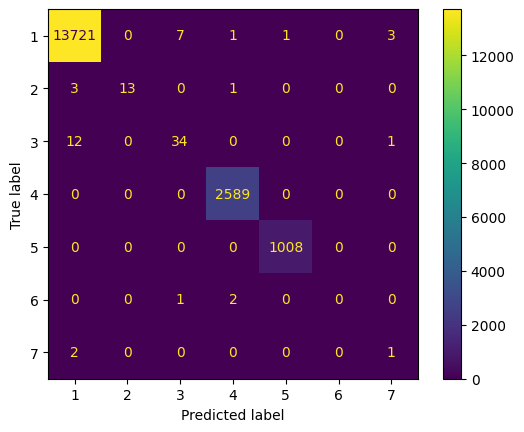

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['class']), data['class'], test_size=0.3, random_state=42)

X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

model = DecisionTreeClassifier()

model.fit(X_train_encoded,y_train)
base_pred = model.predict(X_test)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

cmd.plot()
plt.show()  

In [31]:
print(classification_report(y_test, base_pred, zero_division=1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13733
           2       1.00      0.76      0.87        17
           3       0.81      0.72      0.76        47
           4       1.00      1.00      1.00      2589
           5       1.00      1.00      1.00      1008
           6       1.00      0.00      0.00         3
           7       0.20      0.33      0.25         3

    accuracy                           1.00     17400
   macro avg       0.86      0.69      0.70     17400
weighted avg       1.00      1.00      1.00     17400



In [32]:
model.feature_importances_

array([1.13133860e-01, 1.48485166e-03, 4.25715073e-03, 1.43782327e-03,
       6.84273386e-01, 4.06312106e-04, 1.95006616e-01])

In [33]:
scores = cross_val_score(model, X_train_encoded, y_train, cv=5)
print("Cross-validation scores:", scores)

y_pred = model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Cross-validation scores: [0.99827586 0.99802956 0.9979064  0.99729064 0.99827586]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13733
           2       1.00      0.76      0.87        17
           3       0.81      0.72      0.76        47
           4       1.00      1.00      1.00      2589
           5       1.00      1.00      1.00      1008
           6       1.00      0.00      0.00         3
           7       0.20      0.33      0.25         3

    accuracy                           1.00     17400
   macro avg       0.86      0.69      0.70     17400
weighted avg       1.00      1.00      1.00     17400



---
**Visualize the Tree**

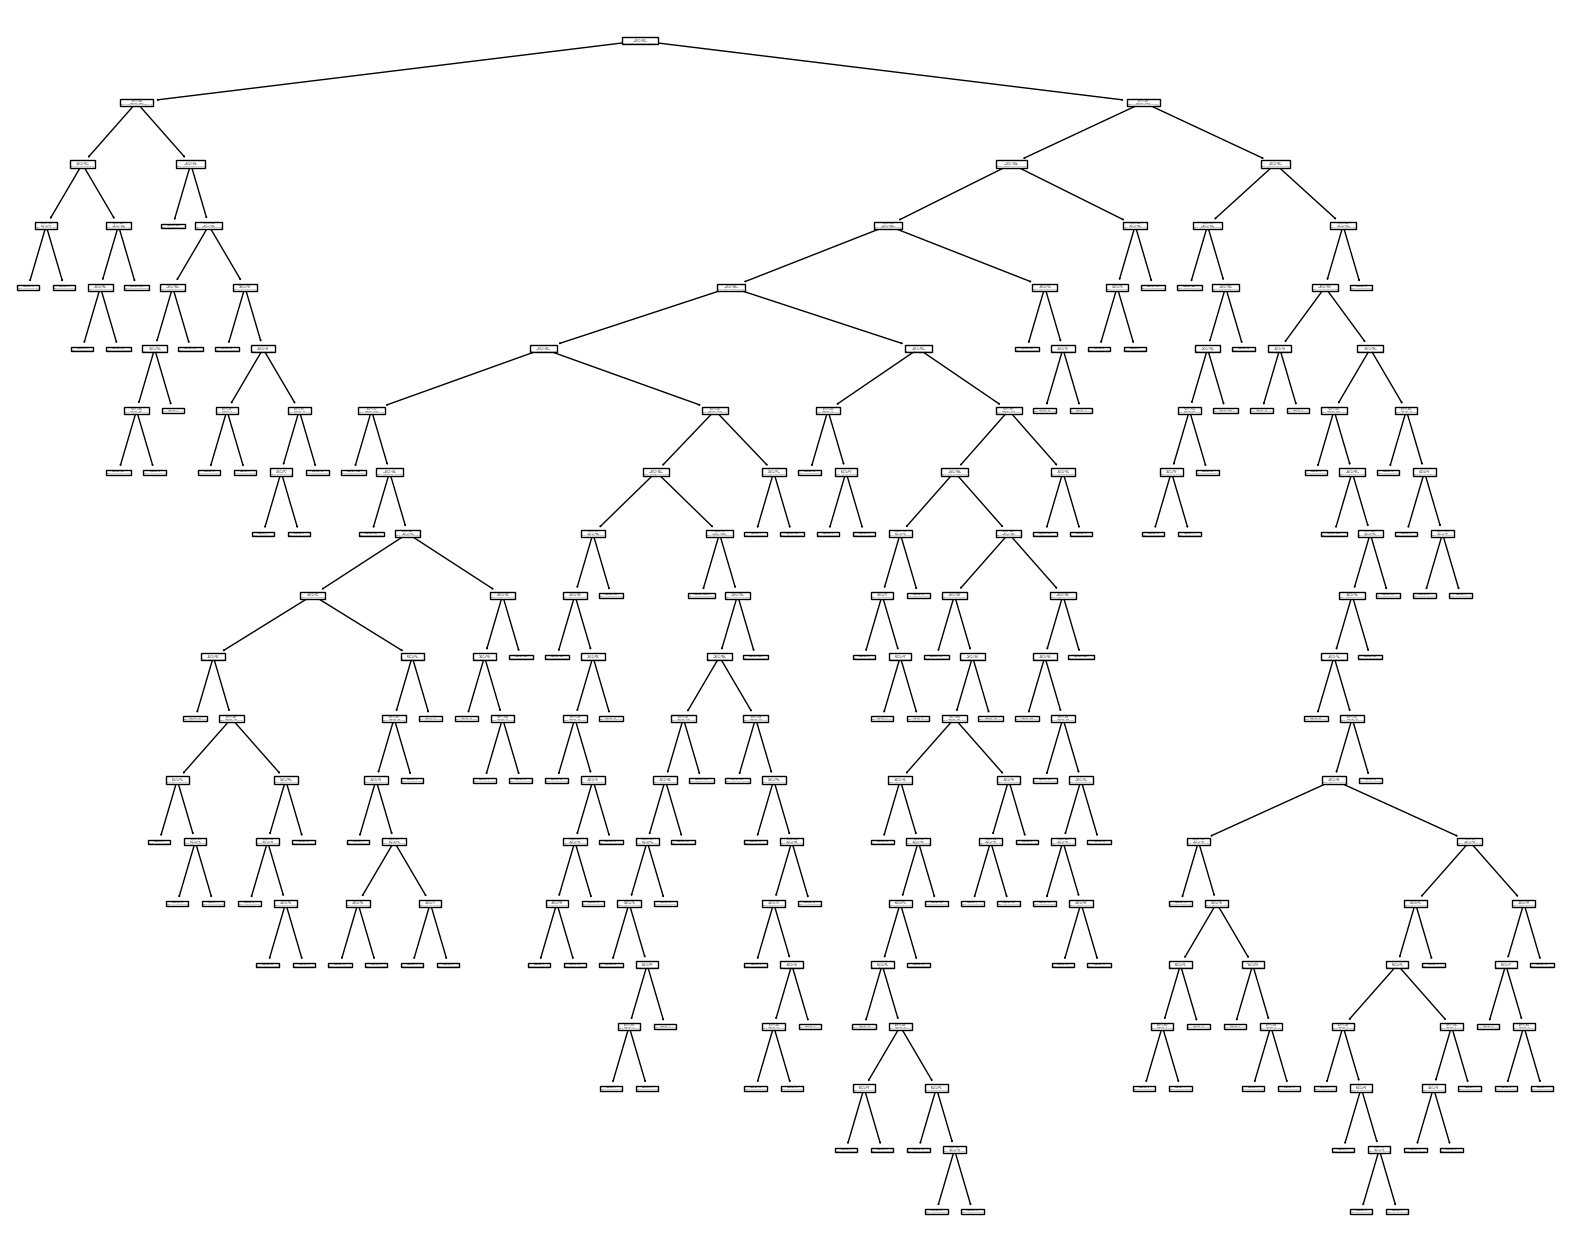

In [34]:
plt.figure(figsize=(20,16))
plot_tree(model);

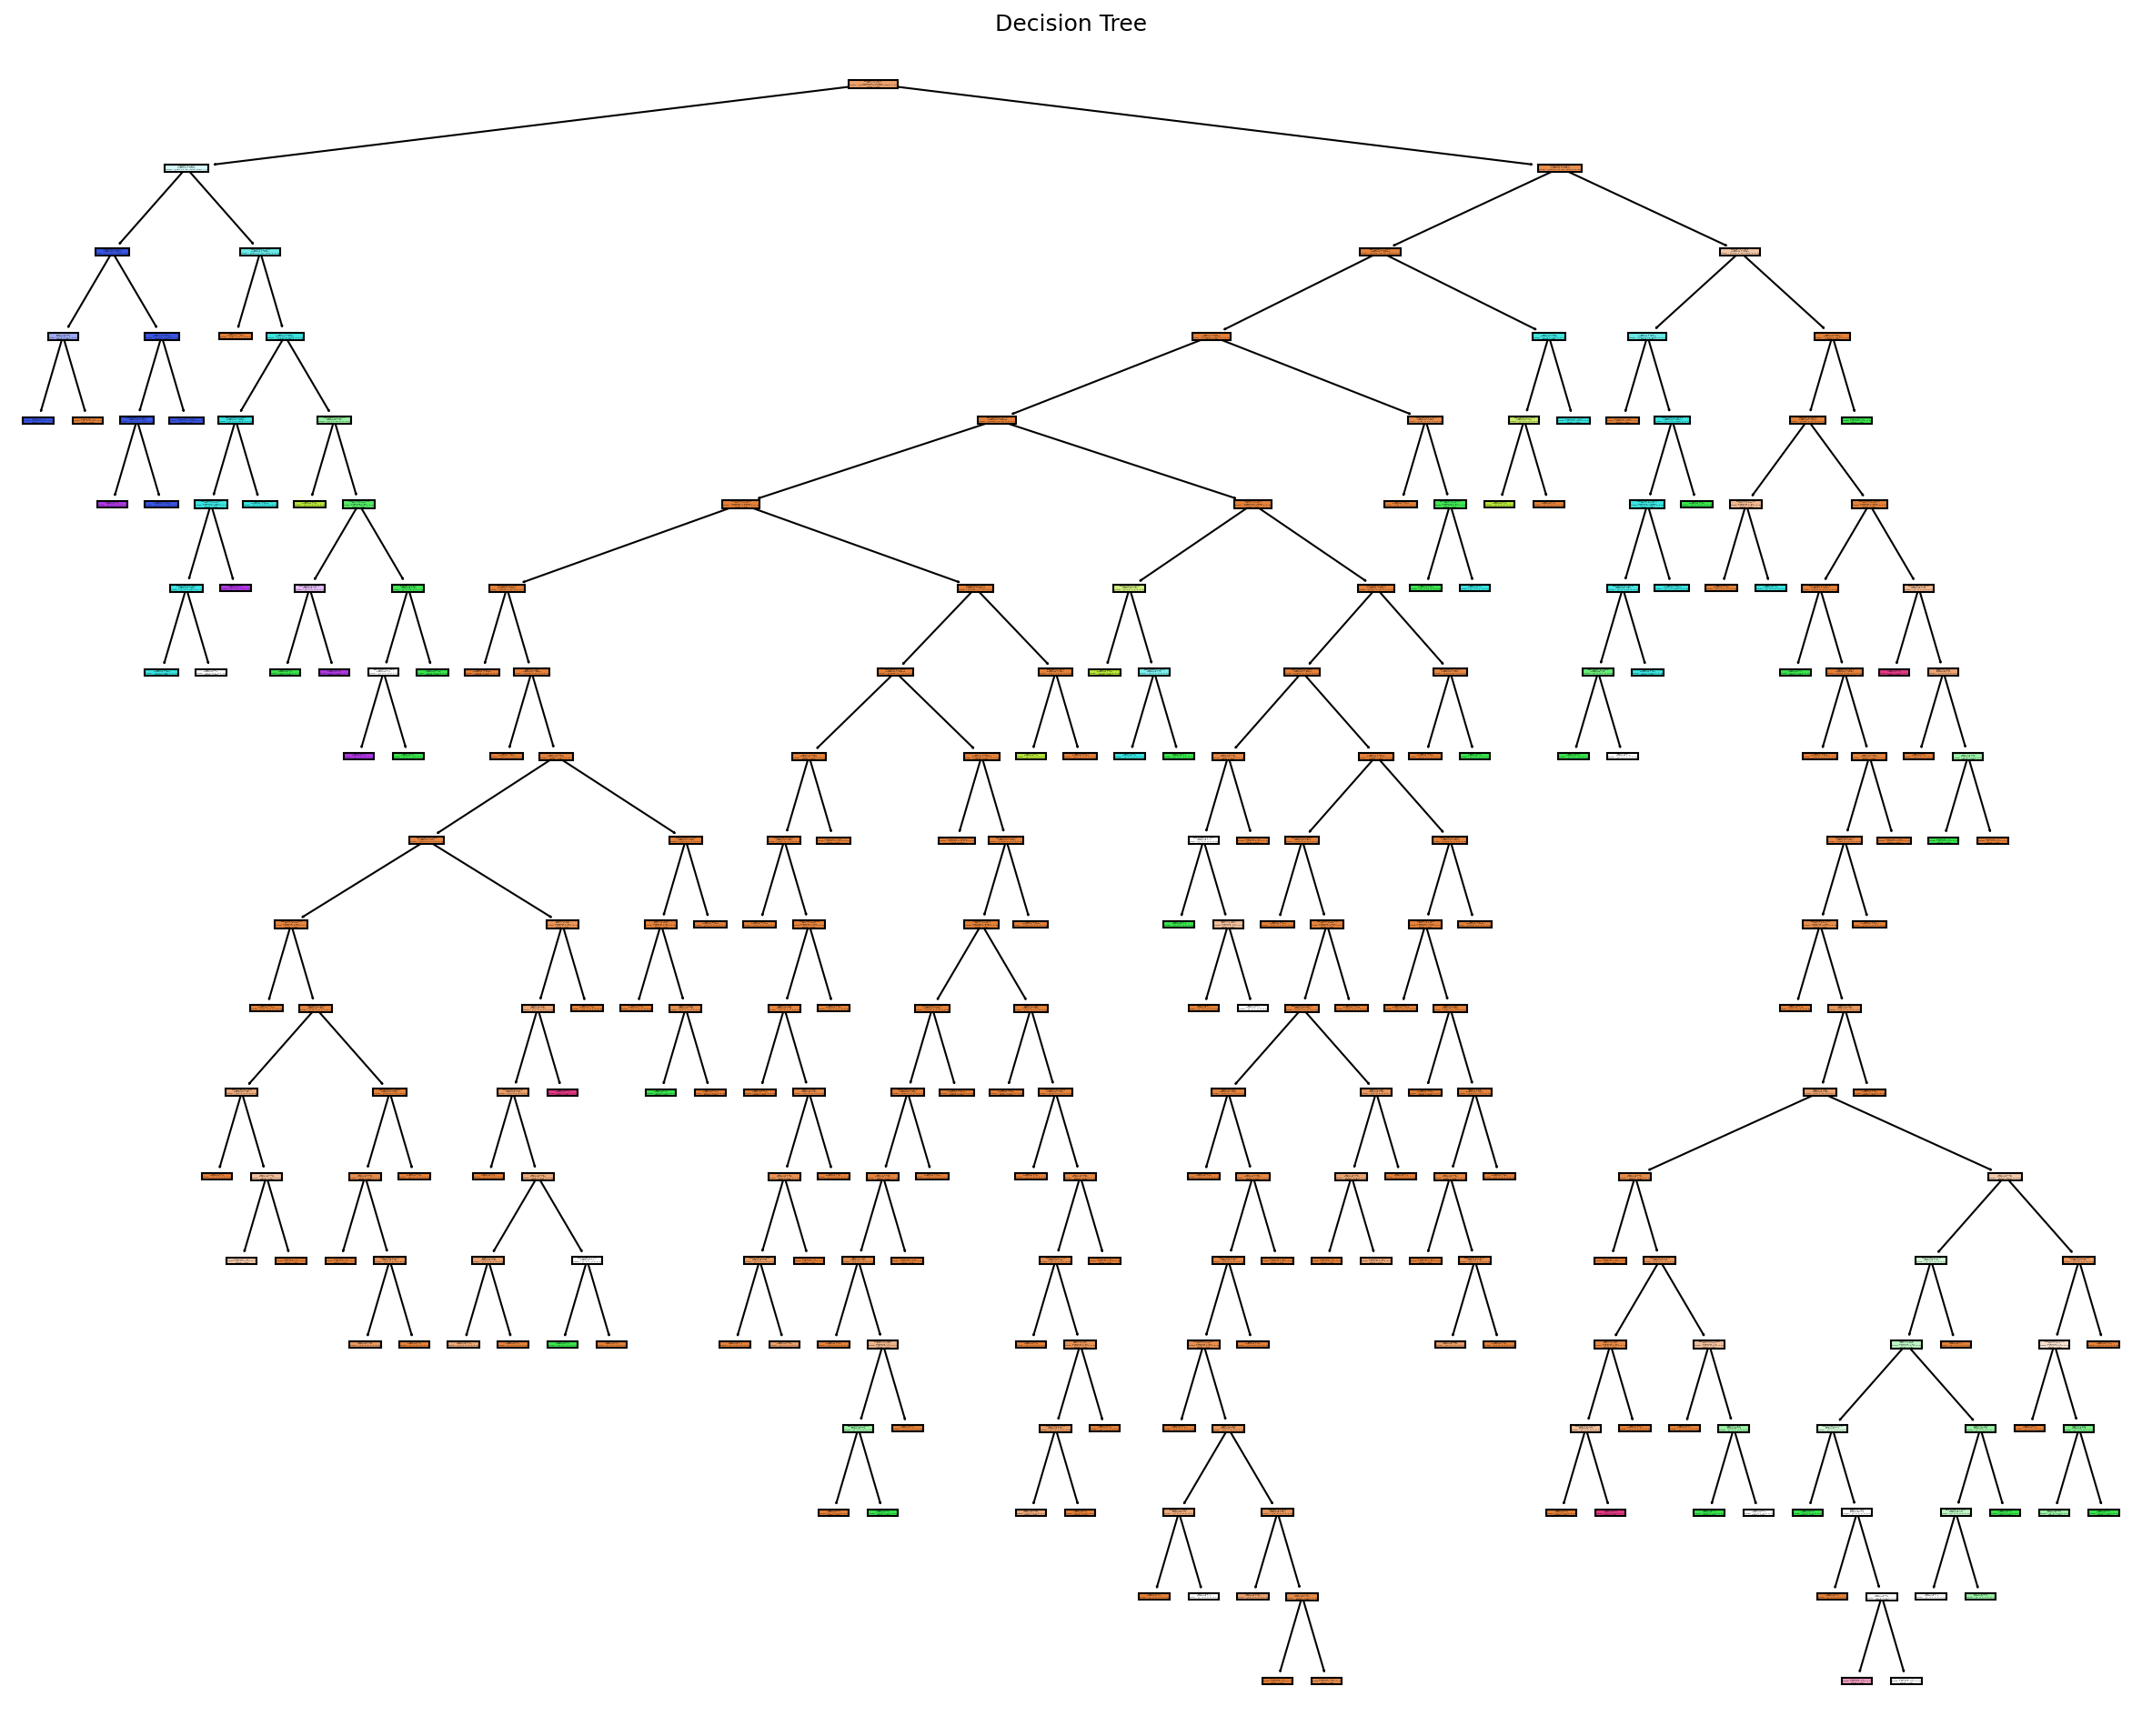

In [35]:
plt.figure(figsize=(20, 16),dpi=150)
plot_tree(model, filled=True, feature_names=X_train_encoded.columns, class_names=True)
plt.title('Decision Tree')
plt.show()

**Reporting Model Results**

In [36]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds,zero_division=1))
    print('\n')

    feature_names = data.columns
    
    print('\
')
    plt.figure(figsize=(12, 8), dpi=150)
    plot_tree(model, filled=True, feature_names=feature_names)

In [37]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           1       0.90      0.98      0.94     13733
           2       1.00      0.00      0.00        17
           3       1.00      0.00      0.00        47
           4       0.80      0.47      0.59      2589
           5       1.00      1.00      1.00      1008
           6       1.00      0.00      0.00         3
           7       1.00      0.00      0.00         3

    accuracy                           0.90     17400
   macro avg       0.96      0.35      0.36     17400
weighted avg       0.89      0.90      0.89     17400






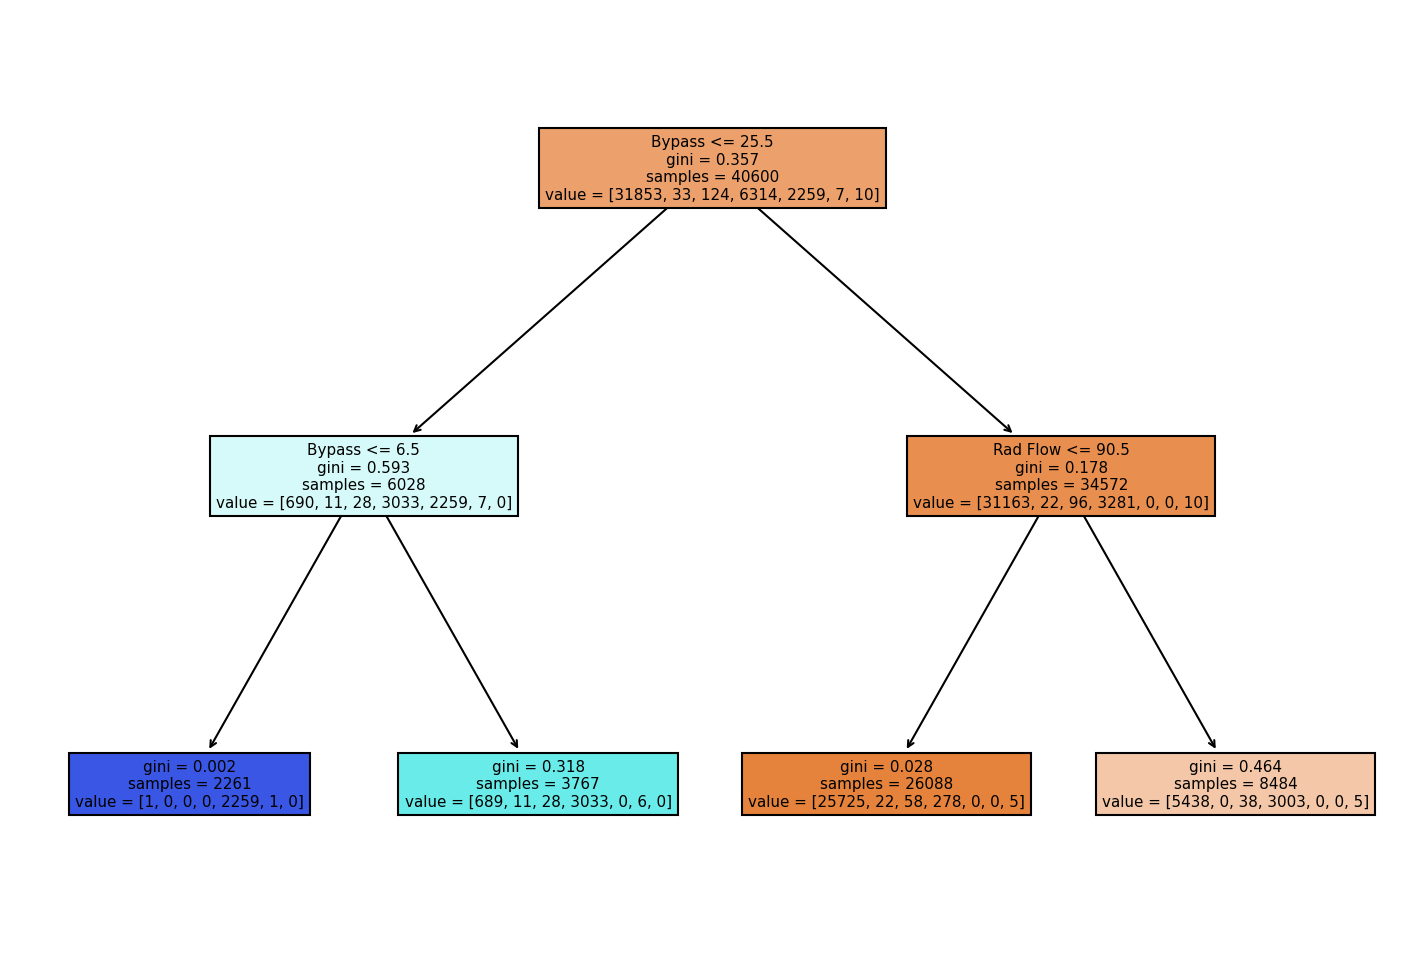

In [38]:
report_model(pruned_tree)


In [39]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           1       0.90      0.98      0.94     13733
           2       1.00      0.00      0.00        17
           3       1.00      0.00      0.00        47
           4       0.80      0.47      0.59      2589
           5       1.00      1.00      1.00      1008
           6       1.00      0.00      0.00         3
           7       1.00      0.00      0.00         3

    accuracy                           0.90     17400
   macro avg       0.96      0.35      0.36     17400
weighted avg       0.89      0.90      0.89     17400






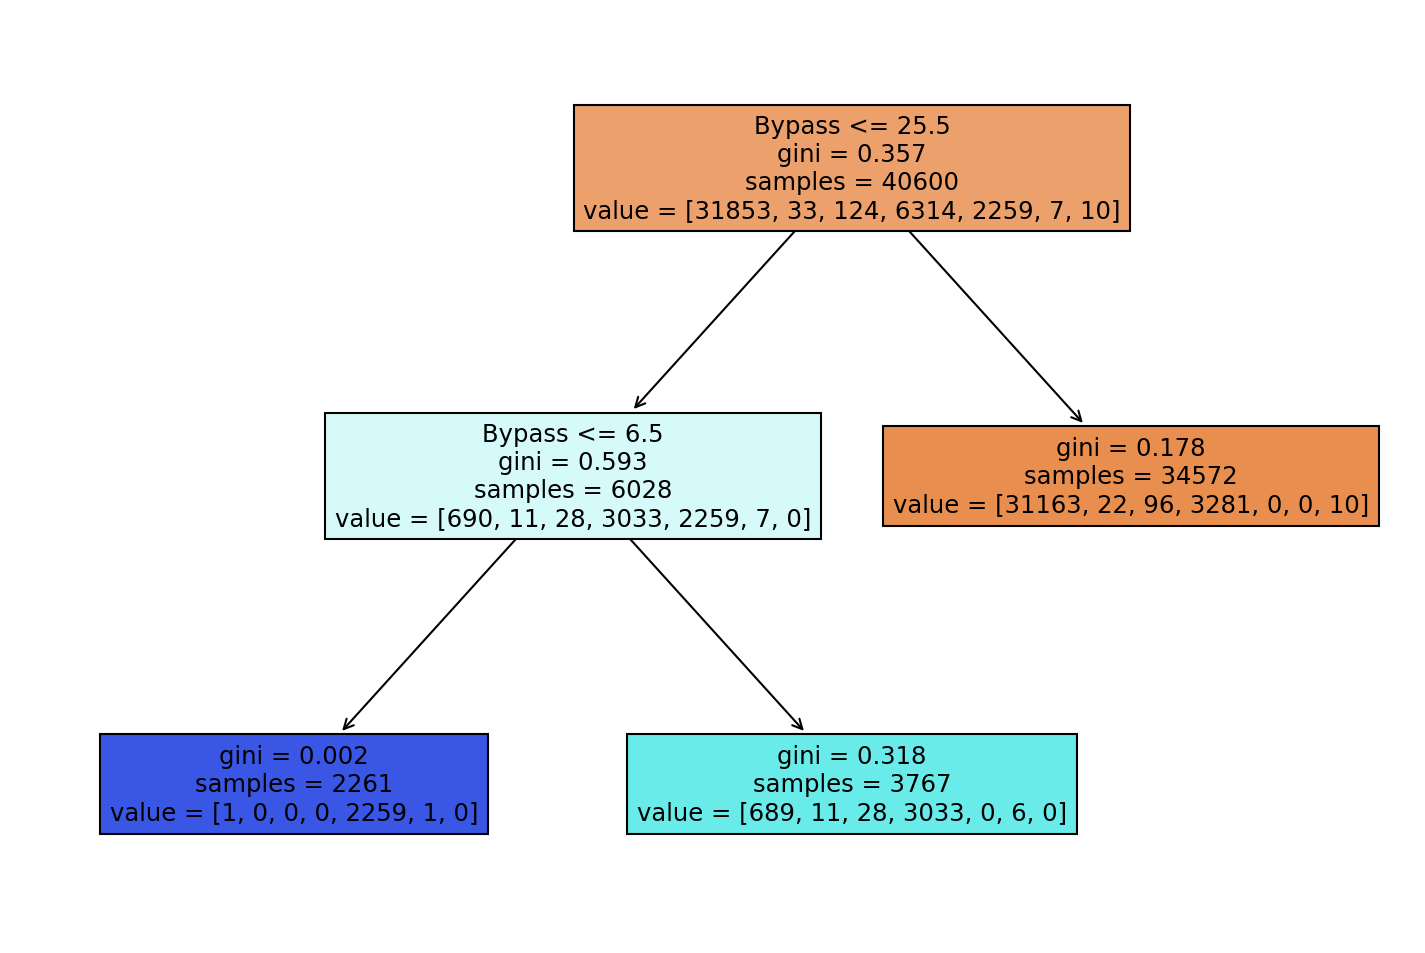

In [40]:
report_model(pruned_tree)

In [41]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13733
           2       0.88      0.82      0.85        17
           3       0.85      0.70      0.77        47
           4       1.00      1.00      1.00      2589
           5       1.00      1.00      1.00      1008
           6       0.00      0.00      1.00         3
           7       0.20      0.33      0.25         3

    accuracy                           1.00     17400
   macro avg       0.70      0.69      0.84     17400
weighted avg       1.00      1.00      1.00     17400






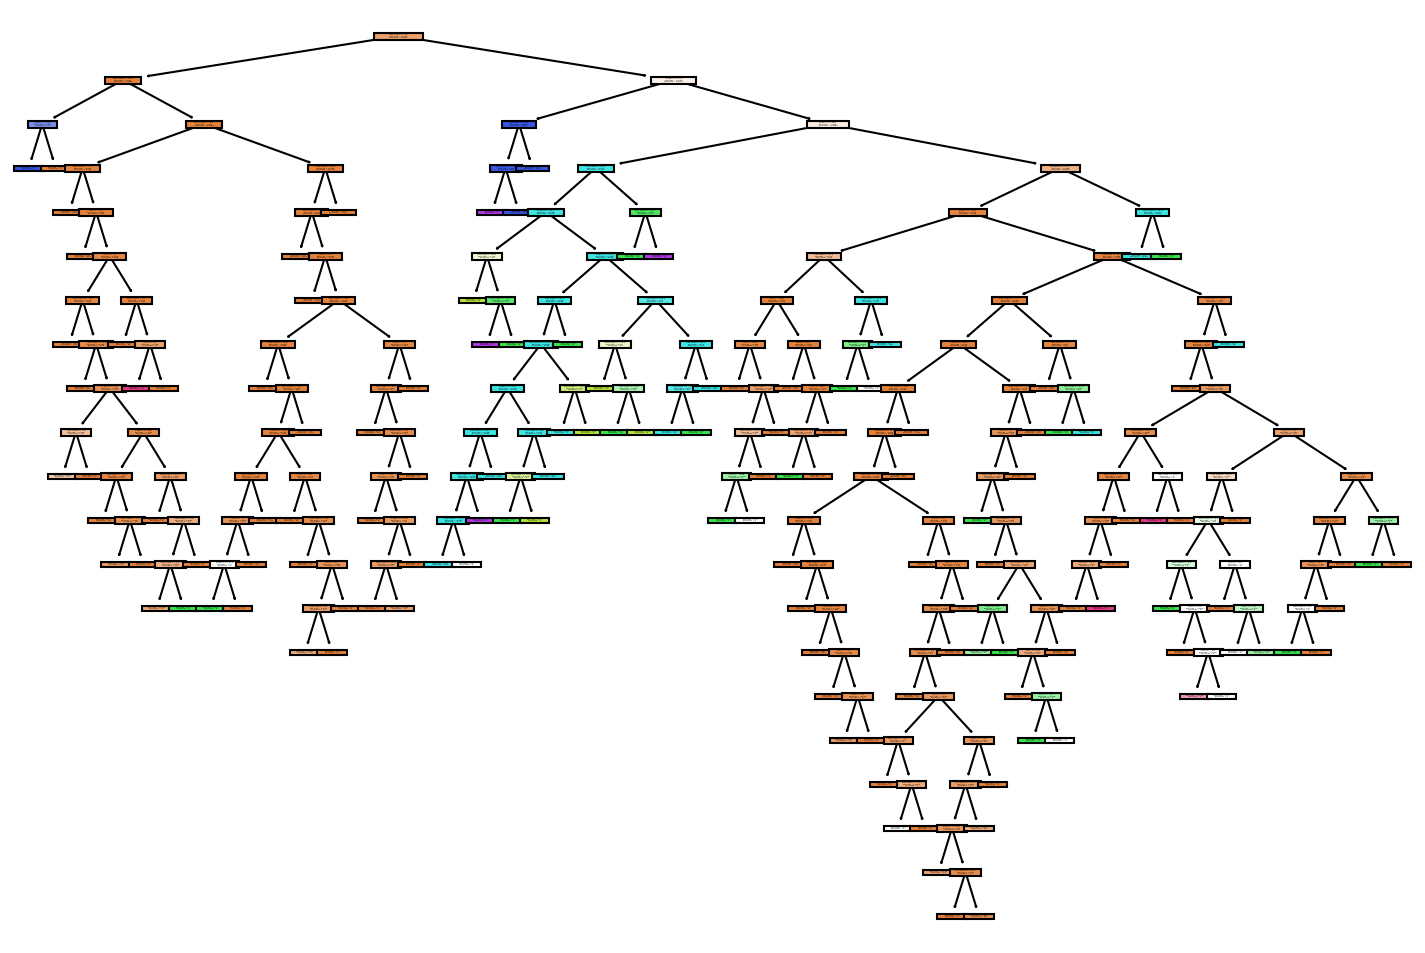

In [42]:
report_model(entropy_tree)

---